## Assignment 2 - Convolutional Neural Networks

In this assignment, you will learn how to implement CNN which you've learnt in the module 2. As a part of this assignment, you will perform image classification using CNNs in PyTorch. The dataset which you'll be using in this assignment will be the standard CIFAR-10 dataset. One important thing you need to know about CIFAR-10 dataset is that the image dimensions in this dataset is 32 $\times$ 32, which is not as same as the MNIST dataset dimension which you might've used while learning FNNs. This notebook contains some pre-written code blocks and some empty cells which you need to fill to build a CNN and perform Image Classification. <br>

### Importing Libraries

In [61]:
# PyTorch Library
import torch
# PyTorch Neural Network
import torch.nn as nn
import torch.nn.functional as F
# Allows us to transform data
import torchvision.transforms as transforms
# Allows us to download the dataset
import torchvision.datasets as dsets
# Used to graph data and loss curves
import matplotlib.pyplot as plt
# Allows us to use arrays to manipulate and store data
import numpy as np
import random
import seaborn

In [62]:
def set_seed(seed=0):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

set_seed(0)

### Load Dataset


In [63]:
### DO NOT CHANGE THIS CODE

composed = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train = dsets.CIFAR10(root='./data', train=True, download=True, transform=composed)
test = dsets.CIFAR10(root='./data', train=False, download=True, transform=composed)

Files already downloaded and verified
Files already downloaded and verified


### Training/Testing Split

Load Dataset<br>
Split the dataset into x_train, y_train, x_test, y_test

In [64]:
from torch.utils.data import random_split, DataLoader

train_ds, val_ds = random_split(train, [45000,5000])
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

### Display Images and Label

Choose 16 images randomly and display them aling with their labels in a 4x4 grid



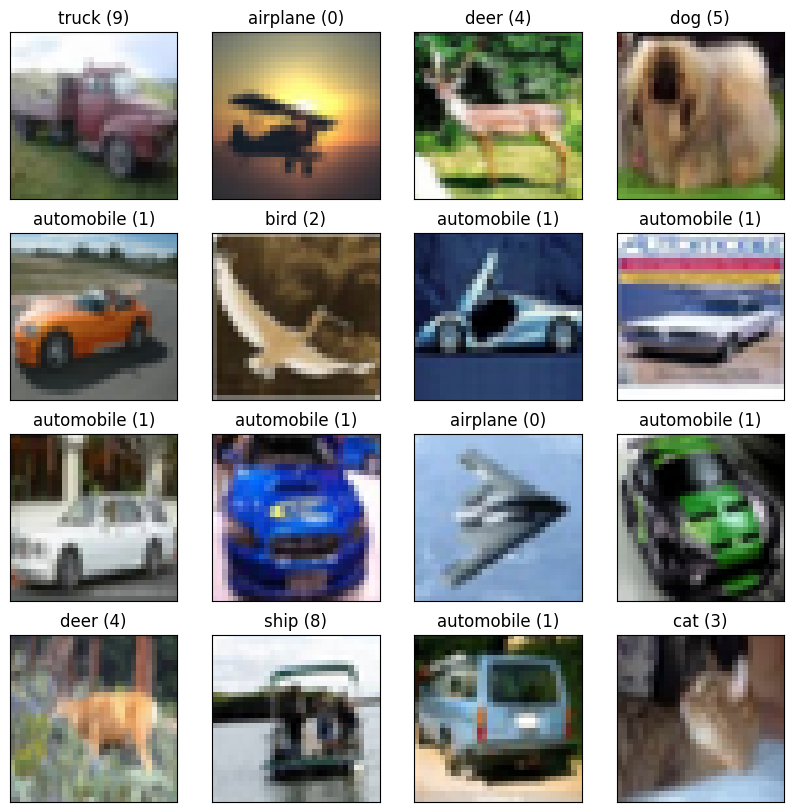

In [65]:
## :)
X_train, y_train = next(iter(val_loader))
random.seed(0)
image_grid = plt.figure(1, figsize=(10,10))
j = 0
for i in random.sample(range(0,64), 16):
  axis = image_grid.add_subplot(4,4,j+1, xticks=[], yticks=[])
  j += 1
  plt.imshow((X_train[i]*0.5 + 0.5).permute(1,2,0))
  axis.set_title(train.classes[y_train[i]] + " " + str(y_train[i])[6:])

### Modelling

Define a class which will form the architecture of your CNN model


In [66]:
class CNN(nn.Module):
    def __init__(self):

        '''Under this function define the convolutional, pooling,
           fully connected layers. Take special care while calculating
           the input and output dimensions of a layer using the kernel
           size, padding and stride'''
        '''This function will defined the overall architecture of your CNN model'''
        super().__init__()
        self.model = nn.Sequential(
            #Input = 3 x 32 x 32, Output = 32 x 32 x 32
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            #Input = 32 x 32 x 32, Output = 32 x 16 x 16
            nn.MaxPool2d(kernel_size=2),

            #Input = 32 x 16 x 16, Output = 64 x 16 x 16
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
            nn.ReLU(),
            #Input = 64 x 16 x 16, Output = 64 x 8 x 8
            nn.MaxPool2d(kernel_size=2),

            #Input = 64 x 8 x 8, Output = 64 x 8 x 8
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1),
            nn.ReLU(),
            #Input = 64 x 8 x 8, Output = 64 x 4 x 4
            nn.MaxPool2d(kernel_size=2),

            nn.Flatten(),
            nn.Linear(64*4*4, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self,x):
        '''In this function, you will put X value through each convolutional,
        pooling, activation function and flatten in to feed to the fully-connected layer'''
        return self.model(x)

### Training


Define the Convolutional Neural Network Classifier, Criterion function, Optimizer, and Train the Model

In [67]:
# define criterion function, optimizer, learning rate, number of epochs
# define 2 lists where you will store the cost and accuracy for each epoch

def train_model(num_epochs):

    '''In this function, you will make prediction for each X value, calculate the loss,
    calculate the gradient value with respect to each weight and bias, accumulate the total loss
    and update the cost and accuracy list'''
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = CNN().to(device)

    # model parameters are defined here
    learning_rate = 0.001
    weight_decay = 0.01
    # loss criterion chosen : Cross entropy loss criteria
    criterion = nn.CrossEntropyLoss()
    # the optimisation function used is Adam optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    train_loss_list = []
    accuracy = []
    for epoch in range(num_epochs):
        train_loss = 0
        model.train()
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss_list.append(train_loss/len(train_train_loader))

        test_acc=0
        model.eval()

        with torch.no_grad():
            for i, (images, labels) in enumerate(test_train_loader):
                images = images.to(device)
                y_given = labels.to(device)
                outputs = model(images)
                _, y_output = torch.max(outputs.data, 1)
                test_acc += (y_given == y_output).sum().item()
            accuracy.append(100 * test_acc / len(test_train))
    print(f"Test set accuracy = {accuracy[-1]} %")
    return [num_epochs, train_loss_list, model, accuracy]
    #Plotting loss for all epochs
    plt.plot(range(1,num_epochs+1), train_loss_list)
    plt.xlabel("Number of epochs")
    plt.ylabel("Training loss")

## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [68]:
## :)
# optimizer function, loss criterion, model are defined in train_model function.
result = train_model(50)


Test set accuracy = 73.08 %


### Analyze Results

Plot the Loss and Accuracy vs Epoch graph

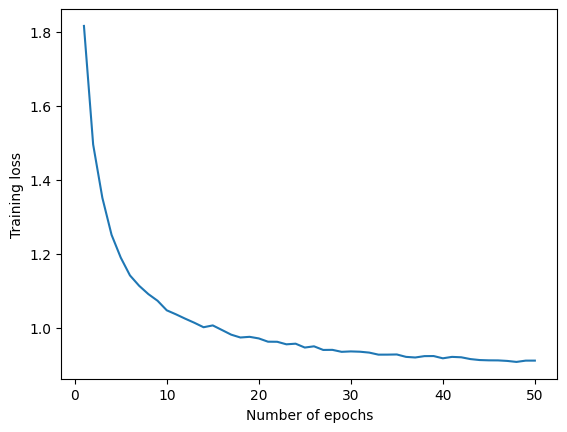

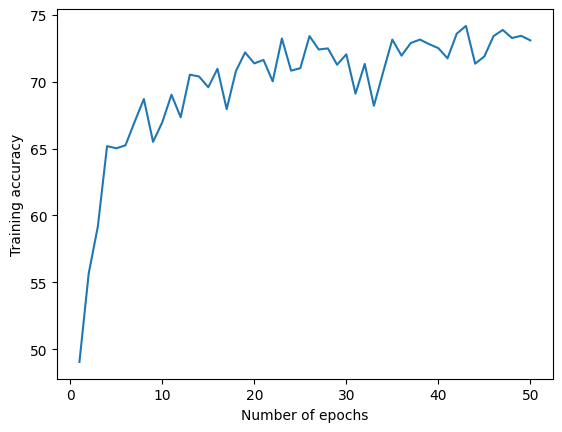

In [69]:
## :)
plt.plot(range(1,result[0]+1), result[1])
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")
plt.show()
plt.plot(range(1,result[0]+1), result[3])
plt.xlabel("Number of epochs")
plt.ylabel("Training accuracy")
plt.show()

### Submission

Create another folder named **Week 2** in your Github Repo.<br>
Save the trained model in a file named ```final_model.pt```. When you are done with the assignment, commit the updated notebook, and the ```final_model.pt``` model-weights file to Github Repo.

In [70]:
## Save the model
from google.colab import files
torch.save(result[2].state_dict(), 'final_model.pt')
files.download('final_model.pt')
# I used google colab so I have to download it.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load the model

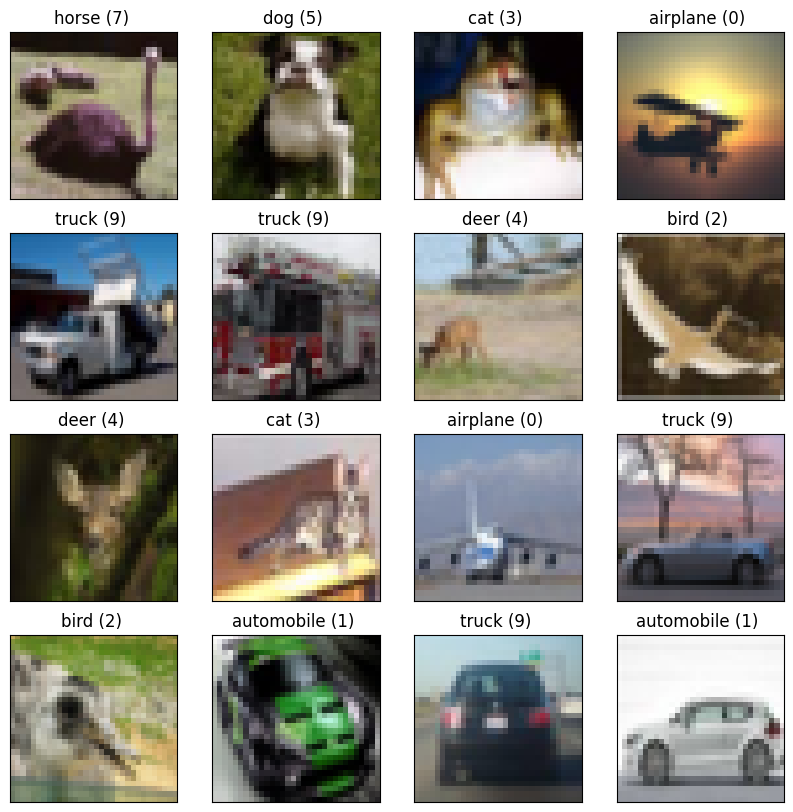

In [71]:
## Load the saved model and Make prediction on few images and display them the same way as before
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN()
model_load = torch.load('final_model.pt')
model.load_state_dict(model_load)

X_test, y_test = next(iter(val_loader))
model_prediction = model(X_test)

_, model_pred = torch.max(model_prediction.data, 1)

image_grid = plt.figure(1, figsize=(10,10))
j = 0
for i in random.sample(range(0,64), 16):
  axis = image_grid.add_subplot(4,4,j+1, xticks=[], yticks=[])
  j += 1
  plt.imshow((X_test[i]*0.5 + 0.5).permute(1,2,0))
  axis.set_title(train.classes[model_pred[i]] + " " + str(model_pred[i])[6:] + " ")
